In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
data = pd.read_csv('/content/aly6080_data.csv')
data.head()

,Year,Month,TARGET VARIABLE,"EMEA, Business Confidence Indicator (BCI)","EMEA, CLI Normalized","EMEA, Consumer Confidence Indicator (CCI)","EMEA, Crude oil prices","EMEA, Employment Rate","EMEA, GDP Normalized","EMEA, Germany ifo Business Climate",...,"EMEA, Production of total construction Index","EMEA, Production of total industry Index","EMEA, Production of total manufactured intermediate goods Index","EMEA, Production of total manufactured investment goods Index","EMEA, Residential Property Sales of Newly Built Dwelings","EMEA, VDMA Agriculture","EMEA, VDMA Construction","EMEA, VDMA Machine Building","EMEA, VDMA Material Handling","EMEA, VDMA Oil Hydraulic"
0,2008,3,56.470288,99.386446,99.557885,98.749106,168.633416,101.237421,101.316538,95.536268,...,100.982924,102.760351,102.130085,105.519810,103.477218,152.230259,78.222050,101.729730,109.491247,99.525480
1,2008,4,58.276205,99.252286,99.302441,98.489578,170.615133,101.084697,101.189693,95.020105,...,99.455811,103.044570,102.162637,105.808424,103.040339,147.498287,79.617964,108.737317,130.367913,96.626406
2,2008,5,56.868989,99.107791,99.027786,98.153161,182.792208,100.932420,101.021160,95.629424,...,97.941626,101.939318,100.863572,104.296346,102.608352,139.180835,74.803818,102.905501,109.939324,87.821297
3,2008,6,56.320007,98.953695,98.723806,97.763344,190.765916,100.780587,100.801964,94.756323,...,97.617816,101.186758,99.971225,103.435500,102.181175,137.021093,74.743418,102.995057,102.128778,88.591610
4,2008,7,52.344385,98.797412,98.384961,97.426953,191.471205,100.645817,100.524887,93.881988,...,97.589115,99.193298,98.533633,100.565160,101.651005,126.194468,66.202091,91.503987,85.019864,79.475532


In [197]:
#missing values
data.isnull().sum()

Year                                                                0
Month                                                               0
TARGET VARIABLE                                                     0
EMEA, Business Confidence Indicator (BCI)                           0
EMEA, CLI Normalized                                                0
EMEA, Consumer Confidence Indicator (CCI)                           0
EMEA, Crude oil prices                                              1
EMEA, Employment Rate                                              39
EMEA, GDP Normalized                                                0
EMEA, Germany ifo Business Climate                                  0
EMEA, ifo Business Expectations                                     0
EMEA, ifo Business Situation                                        0
EMEA, PMI                                                           0
EMEA, Production in total manufacturing Index                       2
EMEA, Production of 

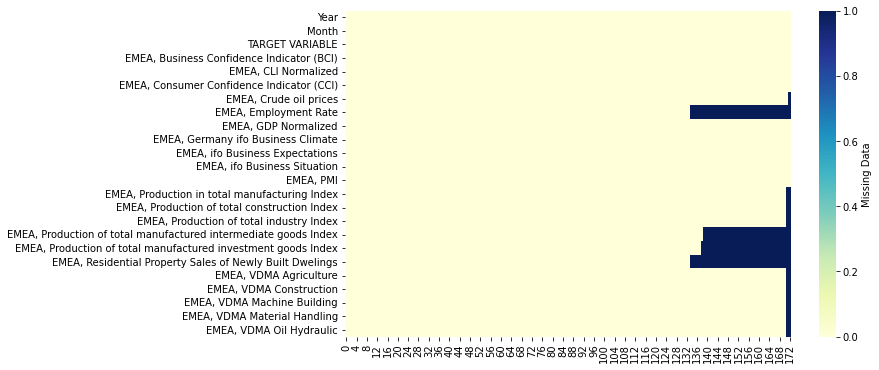

In [198]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

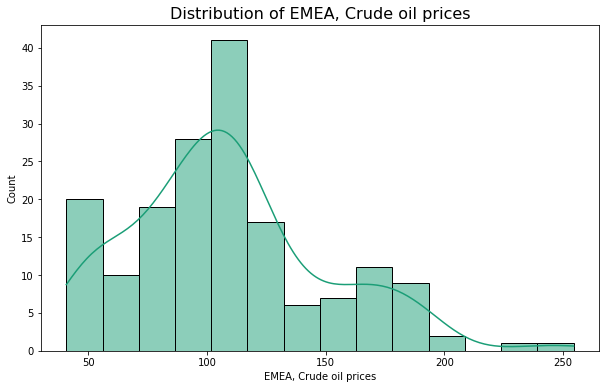

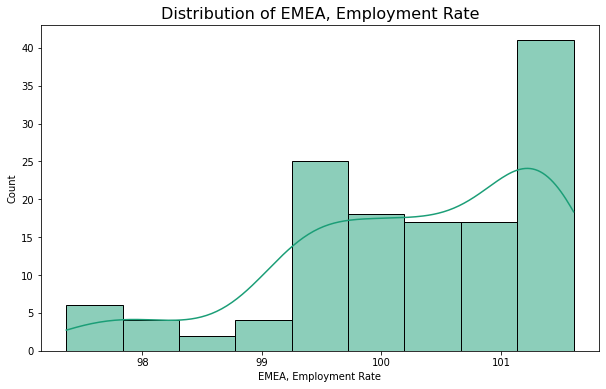

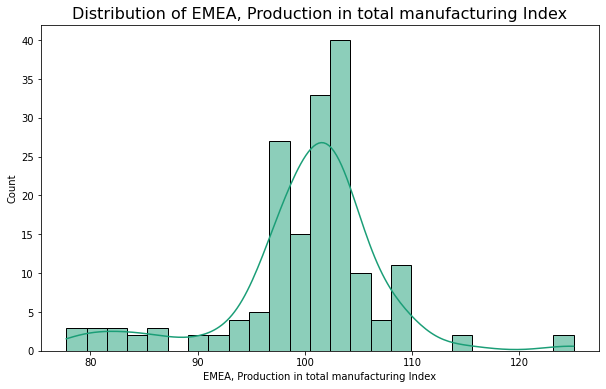

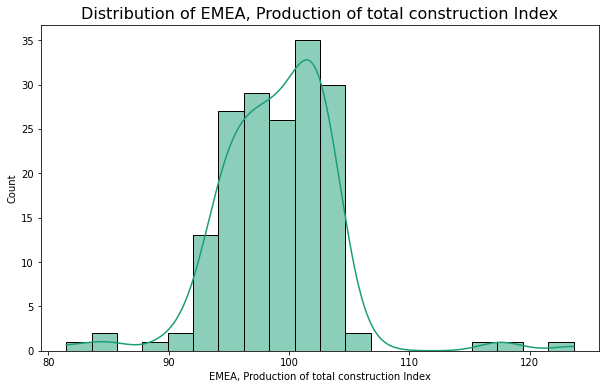

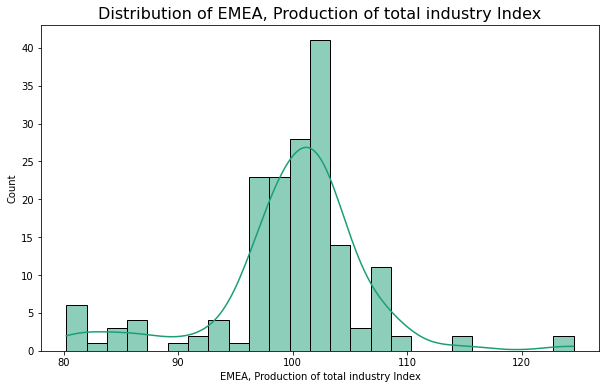

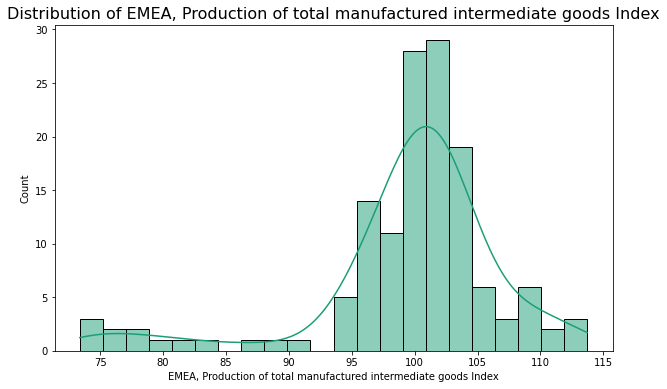

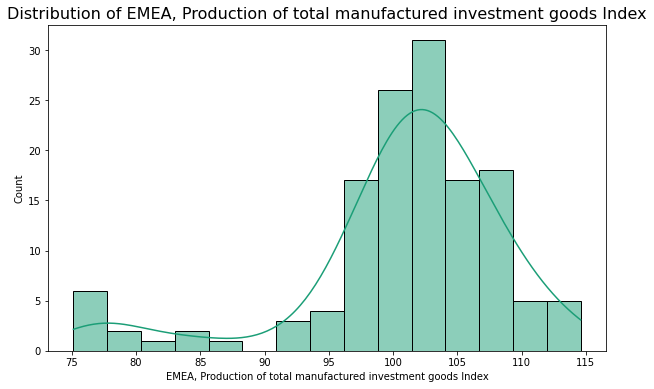

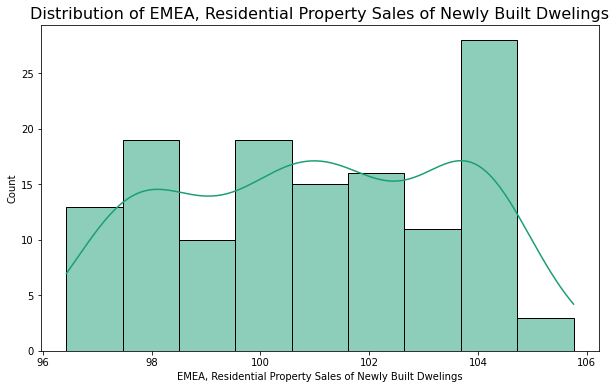

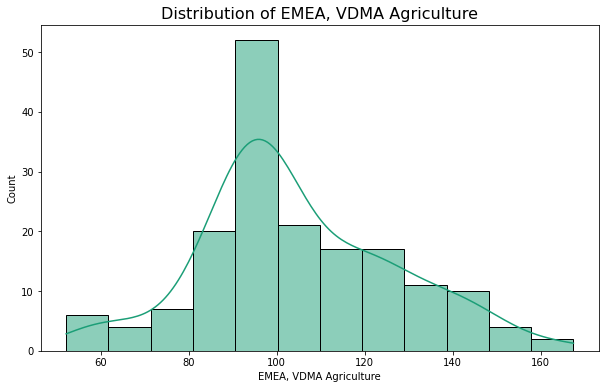

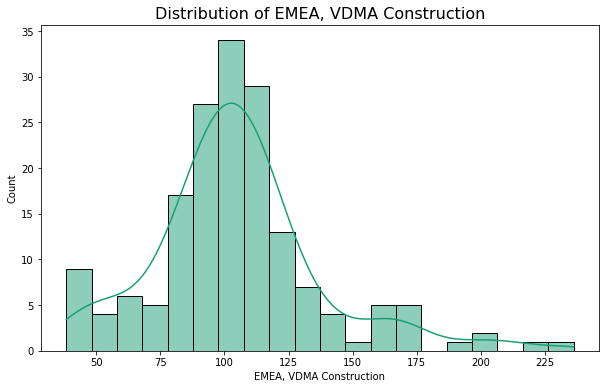

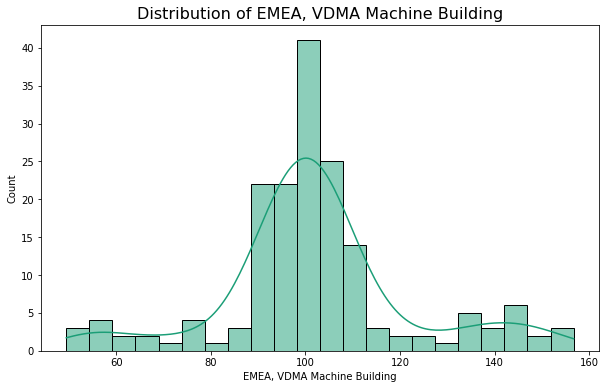

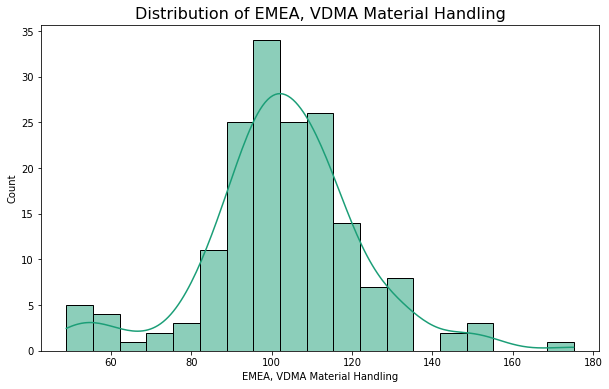

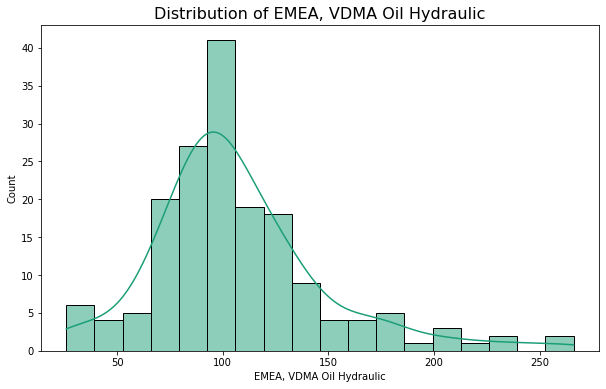

In [199]:
#histograms to chekc the distribution of the features having null values
for col in data.columns:
  if data[col].isnull().values.any():
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title('Distribution of {}'.format(col), size=16)

    

In [200]:
#replacing nulls with median
for col in data.columns:
  if data[col].isnull().values.any():
    data[col] = data[col].fillna(data[col].median())

In [201]:
#checking duplicates
data.duplicated().any()

False

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

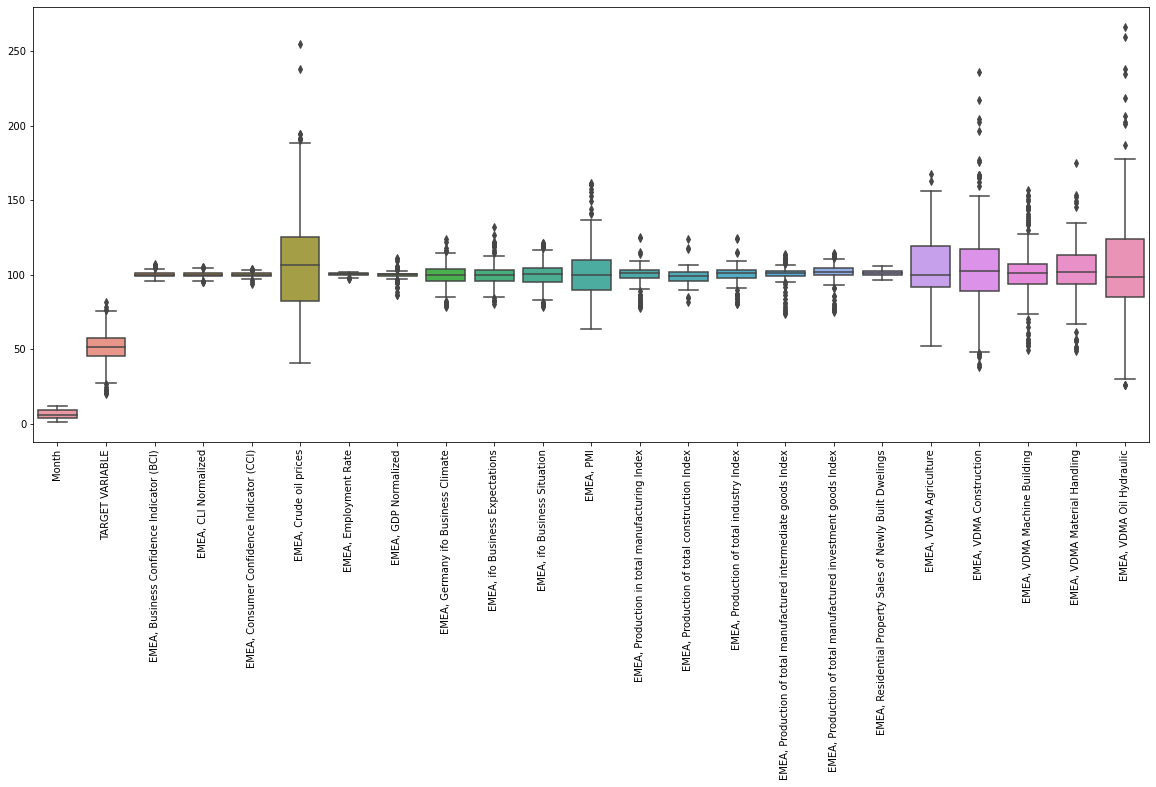

In [202]:
#boxplot to check on outliers
temp = data.drop('Year', axis=1)
plt.figure(figsize=(20, 8))
sns.boxplot(data=temp)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Correlation Plot')

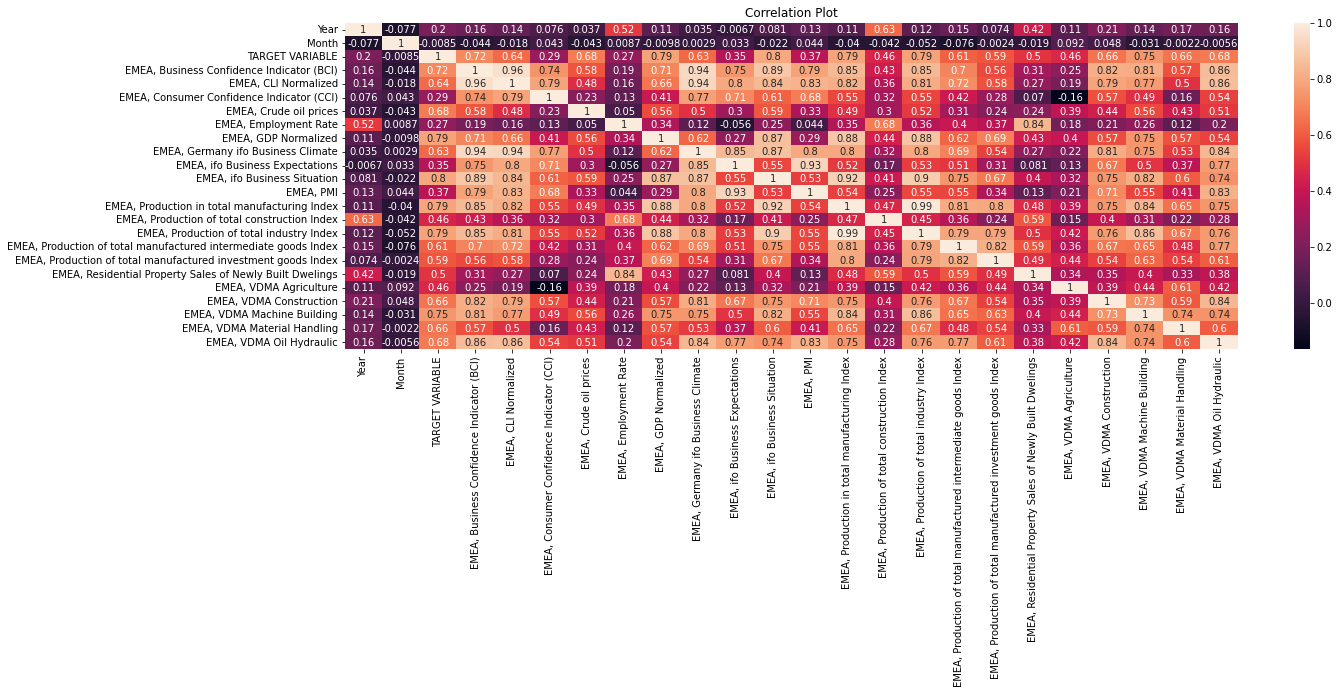

In [203]:
#heatmap to check high correlations
correlation = data.corr(method='spearman')
plt.figure(figsize=(20, 6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Plot')

EMEA, Business Confidence Indicator (BCI) 0.7157223579365043
EMEA, GDP Normalized 0.7851050613959051
EMEA, ifo Business Situation 0.8009952209001024
EMEA, Production in total manufacturing Index 0.7900927257031622
EMEA, Production of total industry Index 0.7856863076869299
EMEA, VDMA Machine Building 0.7536810974824455


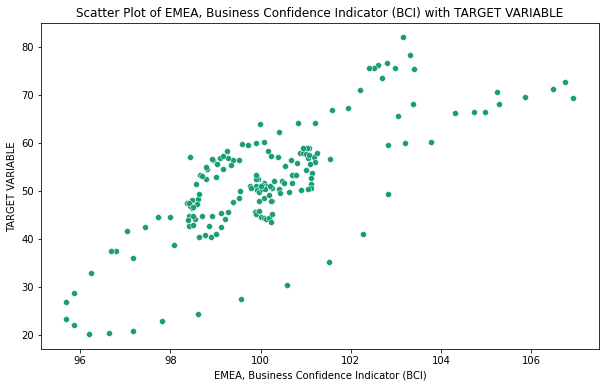

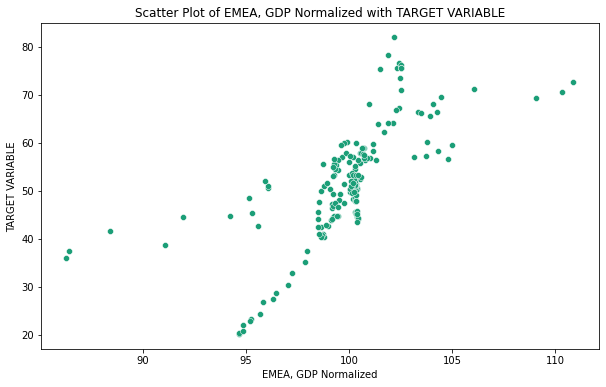

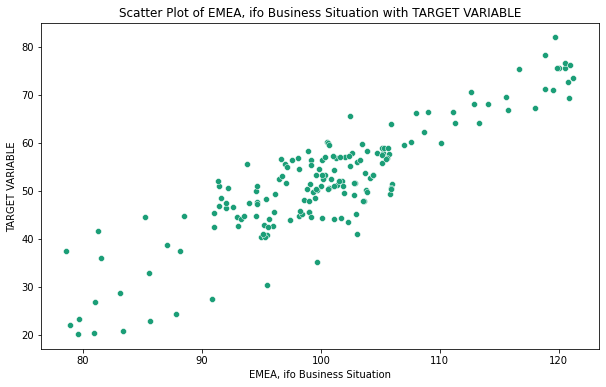

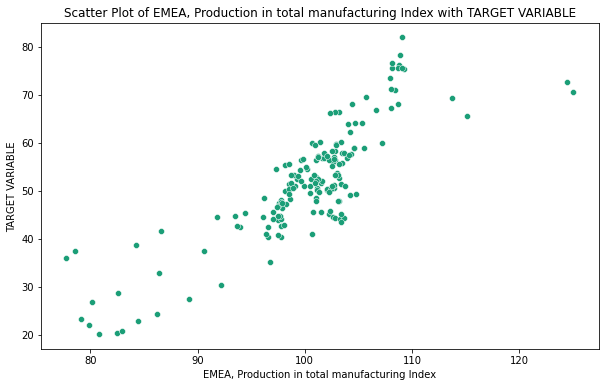

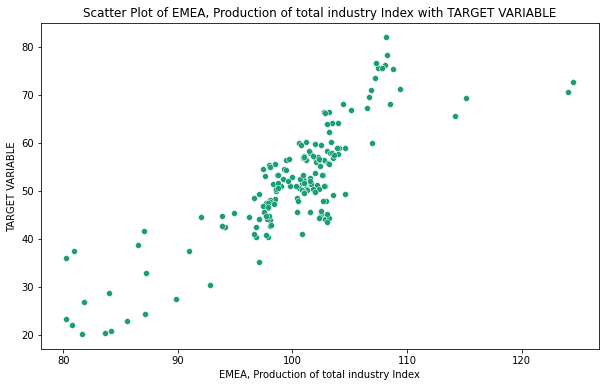

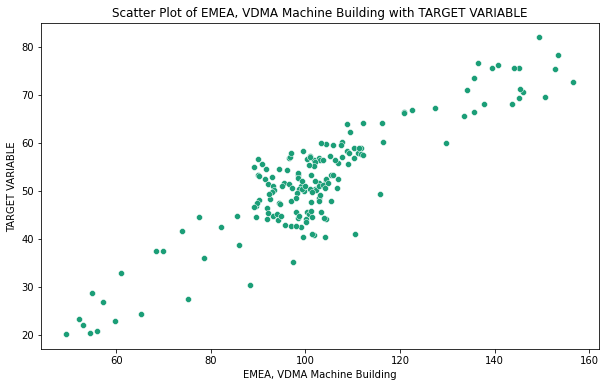

In [204]:
for ind, corr in enumerate(correlation['TARGET VARIABLE']):
  if corr>0.7 or corr< -0.7:
    col_name = correlation['TARGET VARIABLE'].index[ind]
    if col_name !='TARGET VARIABLE':
      print(col_name, corr)
      plt.figure(figsize = (10, 6))
      sns.scatterplot(x = col_name, y = 'TARGET VARIABLE', data=data)
      plt.title('Scatter Plot of {} with TARGET VARIABLE'.format(col_name))


In [205]:
#plotting multicollinearity graph
from statsmodels.stats.outliers_influence import variance_inflation_factor
temp = data.drop('TARGET VARIABLE', axis=1)

multi_results = dict()
while True:
  vif_data = pd.DataFrame()
  vif_data["feature"] = temp.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(temp.values, i)
                            for i in range(len(temp.columns))]
    
  result = vif_data.sort_values(by='VIF', ascending=False)
  col_name = result.iloc[0, 0]
  col_vif = result.iloc[0, 1]
  print(col_name, col_vif)

  if col_vif>5:
    temp.drop(col_name, axis=1, inplace=True)
    multi_results[col_name] = col_vif
  else:
    break

EMEA, CLI Normalized 201347.23815805832
EMEA, Employment Rate 174325.9419441432
EMEA, Business Confidence Indicator (BCI) 97072.00034594898
EMEA, Production of total industry Index 89150.14317134001
EMEA, Germany ifo Business Climate 42407.34698769925
Year 33229.484979810724
EMEA, GDP Normalized 12492.512371297242
EMEA, Residential Property Sales of Newly Built Dwelings 5873.761898558683
EMEA, Production in total manufacturing Index 4636.207330867654
EMEA, Production of total manufactured intermediate goods Index 2890.7624597762615
EMEA, ifo Business Expectations 1642.0205477431302
EMEA, Consumer Confidence Indicator (CCI) 1404.3330855694294
EMEA, ifo Business Situation 715.8668671565075
EMEA, Production of total manufactured investment goods Index 575.9179689973108
EMEA, VDMA Machine Building 233.48115594171858
EMEA, PMI 175.20862047489294
EMEA, VDMA Material Handling 106.93291423557285
EMEA, VDMA Construction 43.29567787814258
EMEA, VDMA Agriculture 31.465964530337214
EMEA, Productio

Text(0.5, 1.0, 'High VIF scores')

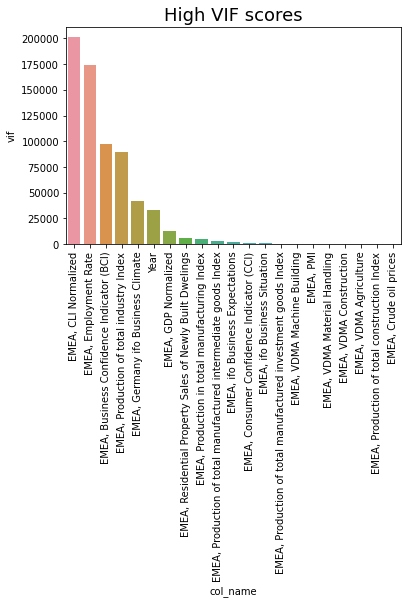

In [206]:
multi_df = pd.DataFrame(multi_results.items(), columns = ['col_name', 'vif'])
sns.barplot(x = 'col_name', y = 'vif', data=multi_df)
plt.xticks(rotation=90)
plt.title('High VIF scores', size=18)

Text(0.5, 1.0, 'Comparison of BCI and CCI')

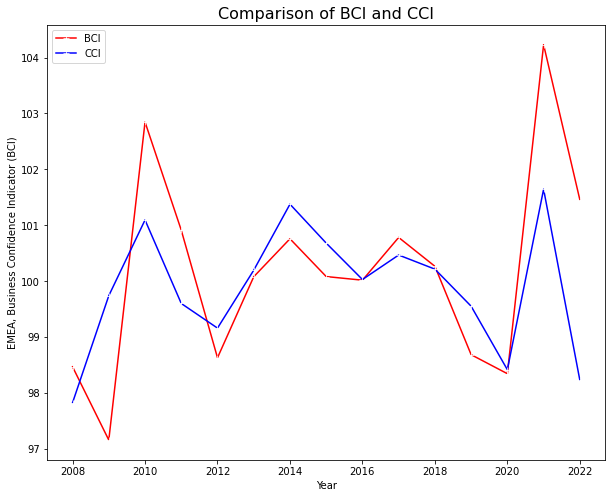

In [207]:
#comparing BCI and CCI
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.lineplot(x='Year', y='EMEA, Business Confidence Indicator (BCI)', ci=None,marker='+', color='r', label='BCI', data=data)
ax = sns.lineplot(x='Year', y='EMEA, Consumer Confidence Indicator (CCI)', ci=None,marker='+', color='b', label='CCI', data=data)
plt.legend()
plt.title('Comparison of BCI and CCI', size=16)

Text(0.5, 1.0, 'Comparison of the KPIs')

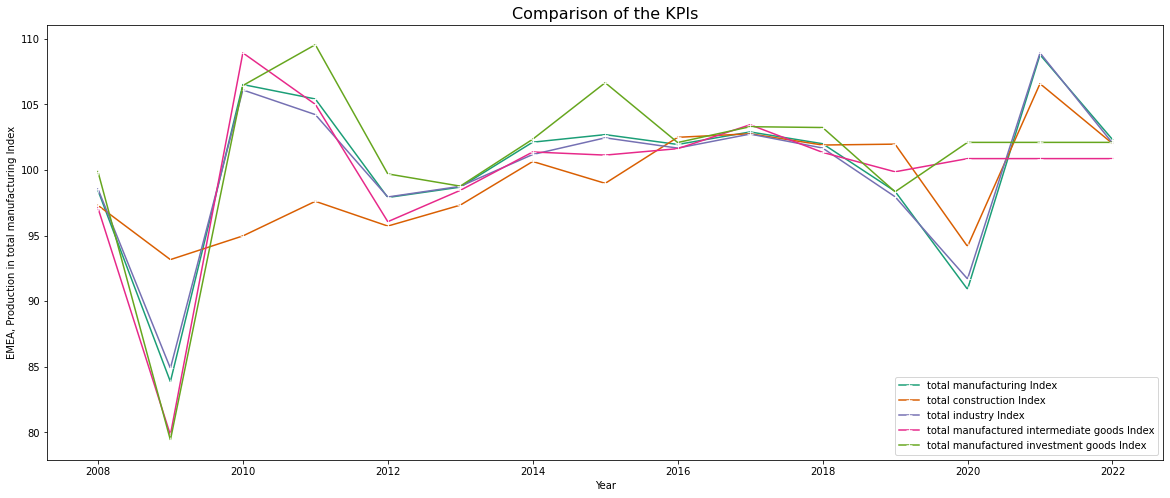

In [208]:
#comparing BCI and CCI
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.lineplot(x='Year', y='EMEA, Production in total manufacturing Index', ci=None, marker='+', label='total manufacturing Index', data=data)
ax = sns.lineplot(x='Year', y='EMEA, Production of total construction Index', ci=None, marker='+', label='total construction Index', data=data)
ax = sns.lineplot(x='Year', y='EMEA, Production of total industry Index', marker='+', ci=None,label='total industry Index', data=data)
ax = sns.lineplot(x='Year', y='EMEA, Production of total manufactured intermediate goods Index', ci=None,marker='+',label='total manufactured intermediate goods Index', data=data)
ax = sns.lineplot(x='Year', y='EMEA, Production of total manufactured investment goods Index', ci=None,marker='+', label='total manufactured investment goods Index', data=data)

plt.legend()
plt.title('Comparison of the KPIs', size=16)

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, AdaBoostRegressor
import xgboost as xgb


lr_model = LinearRegression()
lr_param_grid = {'intercept': [True, False], 'normalize': [True, False]}

sv_model = SVR()
sv_param_grid = {'C': [0.1, 0.5, 0.8, 0.01, 0.05, 1 ], 'kernel': ['linear', 'rbf', 'poly']}

dt_param_grid = {'max_depth': [1, 2, 3, 4, 5, 6]}
dt_model = DecisionTreeRegressor()

gb_param_grid = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.1, 0.001, 0.01, 0.05, 0.5, 0.8], 'n_estimators': [50, 80, 100, 120, 150, 200]}
gb_model = GradientBoostingRegressor()


rf_param_grid = {'n_estimators': [50, 80, 100, 120, 150, 200], 'max_depth': [1, 2, 3, 4,5]}
rf_model = RandomForestRegressor()


ab_param_grid = {'learning_rate': [0.1, 0.001, 0.01, 0.05, 0.5, 0.8], 'n_estimators': [50, 80, 100, 120, 150, 200]}
ab_model = AdaBoostRegressor()


xg_param_grid = {'learning_rate': [0.1, 0.001, 0.01, 0.05, 0.5, 0.8], 'n_estimators': [50, 80, 100, 120, 150, 200], 'max_depth': [1, 2, 3, 4, 5, 6]}
xg_model = xgb.XGBRegressor()

In [210]:
data

,Year,Month,TARGET VARIABLE,"EMEA, Business Confidence Indicator (BCI)","EMEA, CLI Normalized","EMEA, Consumer Confidence Indicator (CCI)","EMEA, Crude oil prices","EMEA, Employment Rate","EMEA, GDP Normalized","EMEA, Germany ifo Business Climate",...,"EMEA, Production of total construction Index","EMEA, Production of total industry Index","EMEA, Production of total manufactured intermediate goods Index","EMEA, Production of total manufactured investment goods Index","EMEA, Residential Property Sales of Newly Built Dwelings","EMEA, VDMA Agriculture","EMEA, VDMA Construction","EMEA, VDMA Machine Building","EMEA, VDMA Material Handling","EMEA, VDMA Oil Hydraulic"
0,2008,3,56.470288,99.386446,99.557885,98.749106,168.633416,101.237421,101.316538,95.536268,...,100.982924,102.760351,102.130085,105.519810,103.477218,152.230259,78.222050,101.729730,109.491247,99.525480
1,2008,4,58.276205,99.252286,99.302441,98.489578,170.615133,101.084697,101.189693,95.020105,...,99.455811,103.044570,102.162637,105.808424,103.040339,147.498287,79.617964,108.737317,130.367913,96.626406
2,2008,5,56.868989,99.107791,99.027786,98.153161,182.792208,100.932420,101.021160,95.629424,...,97.941626,101.939318,100.863572,104.296346,102.608352,139.180835,74.803818,102.905501,109.939324,87.821297
3,2008,6,56.320007,98.953695,98.723806,97.763344,190.765916,100.780587,100.801964,94.756323,...,97.617816,101.186758,99.971225,103.435500,102.181175,137.021093,74.743418,102.995057,102.128778,88.591610
4,2008,7,52.344385,98.797412,98.384961,97.426953,191.471205,100.645817,100.524887,93.881988,...,97.589115,99.193298,98.533633,100.565160,101.651005,126.194468,66.202091,91.503987,85.019864,79.475532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2022,3,59.446688,102.819237,100.971850,100.202020,163.470636,100.404376,105.014124,102.037898,...,104.354493,102.510597,100.863572,102.100331,101.116503,92.703863,94.255319,107.462687,109.973046,93.305439
169,2022,4,56.667345,101.544528,100.501504,98.261451,164.929531,100.404376,104.825643,98.321678,...,103.595369,102.315721,100.863572,102.100331,101.116503,92.216981,88.744589,100.285714,98.518519,87.896825
170,2022,5,58.218333,100.162655,99.933311,96.287703,169.052276,100.404376,104.311251,94.192005,...,102.077687,101.424870,100.863572,102.100331,101.116503,82.216495,85.393258,99.421965,118.766756,85.714286
171,2022,6,57.102472,99.161020,99.368351,94.935876,164.507994,100.404376,103.729523,93.051360,...,99.268112,100.968188,100.863572,102.100331,101.116503,99.567100,102.601156,100.911002,102.091634,98.219788


In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_copy = scaler.fit_transform(data)

In [212]:
data_copy = pd.DataFrame(data_copy, columns = data.columns)

In [213]:
from sklearn.model_selection import train_test_split
x = data_copy.drop('TARGET VARIABLE', axis=1)
y = data_copy['TARGET VARIABLE']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

In [214]:
from sklearn.model_selection import KFold, cross_val_score
sk_folds = KFold(n_splits = 10)
scores = cross_val_score(gb_model, xtrain, ytrain, cv = sk_folds, scoring='neg_root_mean_squared_error')
scores, scores.mean()

(array([-0.02900171, -0.05794672, -0.04517517, -0.04008064, -0.03543801,
        -0.0380424 , -0.02759155, -0.02547025, -0.02840702, -0.0305877 ]),
 -0.035774116775066256)

In [215]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import joblib
sys.modules['sklearn.externals.joblib'] = joblib


In [216]:
# #PCA 
# from sklearn.decomposition import PCA
# print(f'Shape of Train dataset before PCA {xtrain.shape}')
# pca = PCA(n_components=20)
# xtrain_temp = xtrain.copy()
# xtest_temp = xtest.copy()

# xtrain = pca.fit_transform(xtrain_temp)
# xtest = pca.transform(xtest_temp)
# print(f'Shape of Train dataset before PCA {xtrain.shape}')

# explained_variance = pca.explained_variance_ratio_


In [217]:
#Step-wise Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
xtrain_temp = xtrain.copy()
ytrain_temp = ytrain.copy()

sfs1 = sfs(gb_model, k_features=20, forward=True, verbose=2, scoring='neg_root_mean_squared_error')
sfs1.fit(xtrain_temp, ytrain_temp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    2.3s finished

[2022-12-11 00:36:05] Features: 1/20 -- score: -0.09424447140058734[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    2.5s finished

[2022-12-11 00:36:07] Features: 2/20 -- score: -0.05836765085959579[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.6s finished

[2022-12-11 00:36:10] Features: 3/20 -- score: -0.04947187549888869[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

SequentialFeatureSelector(estimator=GradientBoostingRegressor(), k_features=20,
                          scoring='neg_root_mean_squared_error', verbose=2)

In [218]:
features = list(sfs1.k_feature_names_)
print('Features that are not included:')
for col in xtrain.columns:
  if col not in features:
    print(col)
xtrain = xtrain[features]
xtest = xtest[features]

Features that are not included:
EMEA, Production of total manufactured intermediate goods Index
EMEA, Production of total manufactured investment goods Index
EMEA, VDMA Agriculture


In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def tune(model_obj, parameters, cv=3):
    grid_model = GridSearchCV(model_obj, parameters, cv=cv)
    grid_model.fit(xtrain, ytrain)
    ypred_train = grid_model.best_estimator_.predict(xtrain)
    
    train_rmse = mean_squared_error(ytrain, ypred_train)
    train_rmse = np.sqrt(train_rmse)

    ypred = grid_model.best_estimator_.predict(xtest)
    test_rmse = mean_squared_error(ytest, ypred)
    test_rmse = np.sqrt(test_rmse)
    return model_obj, train_rmse, test_rmse, grid_model.best_estimator_

In [220]:
import warnings
warnings.filterwarnings("ignore")

In [221]:
all_models = {'Linear Regression': [lr_model, {}], 'Gradient Boosting': [gb_model, gb_param_grid], 'Random Forest': [rf_model, rf_param_grid], 'AdaBoost':[ab_model, ab_param_grid], 'XGBoost': [xg_model, xg_param_grid], 'Decision Tree': [dt_model, dt_param_grid], 'SVM': [sv_model, sv_param_grid]}
model_results = list()

for model_name, [model_obj, params] in all_models.items():
    model_obj, train_rmse, test_rmse, best_estimator = tune(model_obj, params, cv=3)
    model_results.append([model_name, train_rmse, test_rmse, best_estimator])
    print(model_name, train_rmse, test_rmse, best_estimator)

Linear Regression 0.0341106175551884 0.038242268961247196 LinearRegression()
Gradient Boosting 0.008232304669907901 0.03396737556189123 GradientBoostingRegressor(max_depth=2, n_estimators=200)
Random Forest 0.02666628071818737 0.03223588448720544 RandomForestRegressor(max_depth=5, n_estimators=150)
AdaBoost 0.0341197399556068 0.04623052702597961 AdaBoostRegressor(learning_rate=0.8, n_estimators=200)
[00:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now dep

In [222]:
results = list()
for result in model_results:
  model_name = result[0]
  train_rmse = result[1]
  test_rmse = result[2]
  results.append([model_name, 'Training RMSE', train_rmse])
  results.append([model_name, 'Testing RMSE', test_rmse])

results = pd.DataFrame(results, columns = ['model', 'metrics', 'value'])
results

,model,metrics,value
0,Linear Regression,Training RMSE,0.034111
1,Linear Regression,Testing RMSE,0.038242
2,Gradient Boosting,Training RMSE,0.008232
3,Gradient Boosting,Testing RMSE,0.033967
4,Random Forest,Training RMSE,0.026666
5,Random Forest,Testing RMSE,0.032236
6,AdaBoost,Training RMSE,0.034120
7,AdaBoost,Testing RMSE,0.046231
8,XGBoost,Training RMSE,0.015456
9,XGBoost,Testing RMSE,0.038749


#LSTMs

In [223]:
data

,Year,Month,TARGET VARIABLE,"EMEA, Business Confidence Indicator (BCI)","EMEA, CLI Normalized","EMEA, Consumer Confidence Indicator (CCI)","EMEA, Crude oil prices","EMEA, Employment Rate","EMEA, GDP Normalized","EMEA, Germany ifo Business Climate",...,"EMEA, Production of total construction Index","EMEA, Production of total industry Index","EMEA, Production of total manufactured intermediate goods Index","EMEA, Production of total manufactured investment goods Index","EMEA, Residential Property Sales of Newly Built Dwelings","EMEA, VDMA Agriculture","EMEA, VDMA Construction","EMEA, VDMA Machine Building","EMEA, VDMA Material Handling","EMEA, VDMA Oil Hydraulic"
0,2008,3,56.470288,99.386446,99.557885,98.749106,168.633416,101.237421,101.316538,95.536268,...,100.982924,102.760351,102.130085,105.519810,103.477218,152.230259,78.222050,101.729730,109.491247,99.525480
1,2008,4,58.276205,99.252286,99.302441,98.489578,170.615133,101.084697,101.189693,95.020105,...,99.455811,103.044570,102.162637,105.808424,103.040339,147.498287,79.617964,108.737317,130.367913,96.626406
2,2008,5,56.868989,99.107791,99.027786,98.153161,182.792208,100.932420,101.021160,95.629424,...,97.941626,101.939318,100.863572,104.296346,102.608352,139.180835,74.803818,102.905501,109.939324,87.821297
3,2008,6,56.320007,98.953695,98.723806,97.763344,190.765916,100.780587,100.801964,94.756323,...,97.617816,101.186758,99.971225,103.435500,102.181175,137.021093,74.743418,102.995057,102.128778,88.591610
4,2008,7,52.344385,98.797412,98.384961,97.426953,191.471205,100.645817,100.524887,93.881988,...,97.589115,99.193298,98.533633,100.565160,101.651005,126.194468,66.202091,91.503987,85.019864,79.475532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2022,3,59.446688,102.819237,100.971850,100.202020,163.470636,100.404376,105.014124,102.037898,...,104.354493,102.510597,100.863572,102.100331,101.116503,92.703863,94.255319,107.462687,109.973046,93.305439
169,2022,4,56.667345,101.544528,100.501504,98.261451,164.929531,100.404376,104.825643,98.321678,...,103.595369,102.315721,100.863572,102.100331,101.116503,92.216981,88.744589,100.285714,98.518519,87.896825
170,2022,5,58.218333,100.162655,99.933311,96.287703,169.052276,100.404376,104.311251,94.192005,...,102.077687,101.424870,100.863572,102.100331,101.116503,82.216495,85.393258,99.421965,118.766756,85.714286
171,2022,6,57.102472,99.161020,99.368351,94.935876,164.507994,100.404376,103.729523,93.051360,...,99.268112,100.968188,100.863572,102.100331,101.116503,99.567100,102.601156,100.911002,102.091634,98.219788


Text(0.5, 1.0, 'Sales Trend over Years')

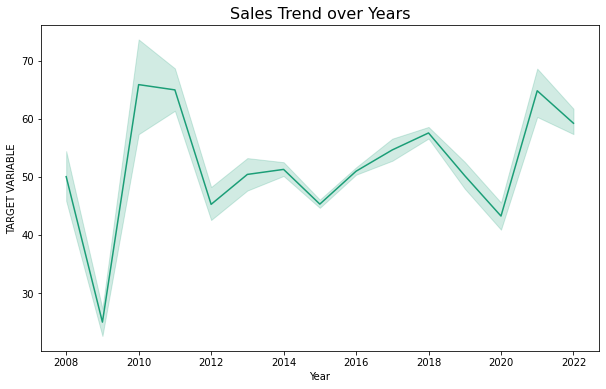

In [224]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'Year', y = 'TARGET VARIABLE' , data=data, markers=['o', 'o'])
plt.title('Sales Trend over Years', size=16)

In [225]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

def fit_lstm(X , y, batch_size, nb_epoch):
  X = np.array(X)
  X = X.reshape(X.shape[0], 1, X.shape[1])
  model = Sequential()
  model.add(LSTM(64, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  for i in range(nb_epoch):
    model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
    model.reset_states()
  return model

In [226]:
model = fit_lstm(xtrain, ytrain, batch_size=1, nb_epoch=100)

155/155 [==============================] - 0s 2ms/step - loss: 0.0011


In [227]:
def forecast(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

In [228]:
train_result = list()
for X in xtrain.values:
  ypred = forecast(model, 1, np.array(X))
  train_result.append(ypred)

test_result = list()
for X in xtest.values:
  ypred = forecast(model, 1, np.array(X))
  test_result.append(ypred)



1/1 [==============================] - 0s 14ms/step


In [229]:
train_lstm_mse = mean_squared_error(ytrain, train_result)
train_lstm_rmse = np.sqrt(train_lstm_mse)

test_lstm_mse = mean_squared_error(ytest, test_result)
test_lstm_rmse = np.sqrt(test_lstm_mse)

In [230]:
print(f'Train RMSE of LSTM is {train_lstm_rmse}')
print(f'Test RMSE of LSTM is {test_lstm_rmse}')
results = results.append({'model': 'LSTM', 'metrics': 'Training RMSE', 'value': train_lstm_rmse}, ignore_index=True)
results = results.append({'model': 'LSTM', 'metrics': 'Testing RMSE', 'value': test_lstm_rmse}, ignore_index=True)
results

Train RMSE of LSTM is 0.035607046359833444
Test RMSE of LSTM is 0.0631403289260993


,model,metrics,value
0,Linear Regression,Training RMSE,0.034111
1,Linear Regression,Testing RMSE,0.038242
2,Gradient Boosting,Training RMSE,0.008232
3,Gradient Boosting,Testing RMSE,0.033967
4,Random Forest,Training RMSE,0.026666
5,Random Forest,Testing RMSE,0.032236
6,AdaBoost,Training RMSE,0.034120
7,AdaBoost,Testing RMSE,0.046231
8,XGBoost,Training RMSE,0.015456
9,XGBoost,Testing RMSE,0.038749


Text(0.5, 1.0, 'Performance of Models')

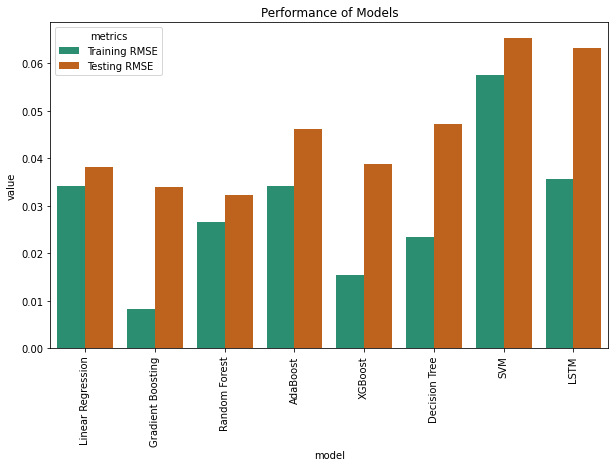

In [231]:
sns.set_palette('Dark2')
plt.figure(figsize=(10, 6))
sns.barplot(x = 'model', y = 'value', hue='metrics', data=results)
plt.xticks(rotation=90)
plt.title('Performance of Models')